In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset=randn(25)

(0.0, 1.0)

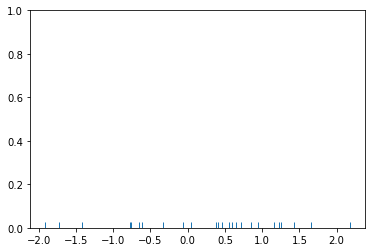

In [6]:
sns.rugplot(dataset)
plt.ylim(0,1)

<AxesSubplot:>

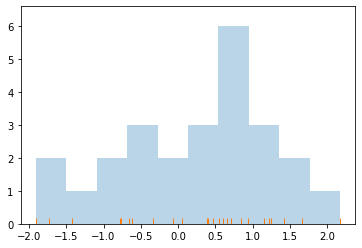

In [7]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

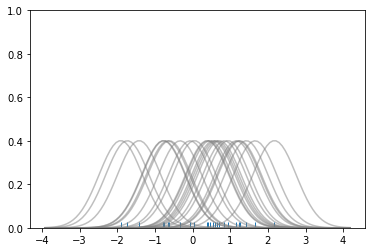

In [9]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)
    
    
    
    
    
    
    
    

Text(0.5, 0.98, 'Sum of the basis functions')

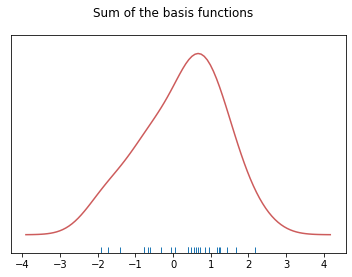

In [10]:
sum_of_kde=np.sum(kernel_list,axis=0)

fig=plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

<AxesSubplot:ylabel='Density'>

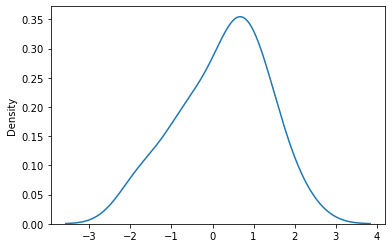

In [11]:
sns.kdeplot(dataset)

C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.75 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` 

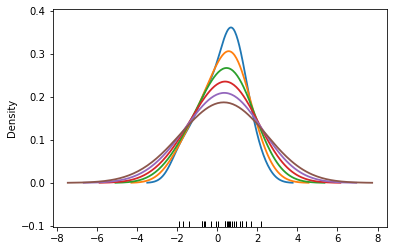

In [13]:
sns.rugplot(dataset,color='black')

for bw in np.arange (0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\ivaxevani\A

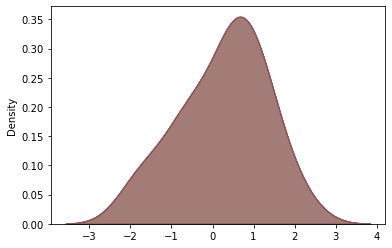

In [15]:
kernel_options=['biw','cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

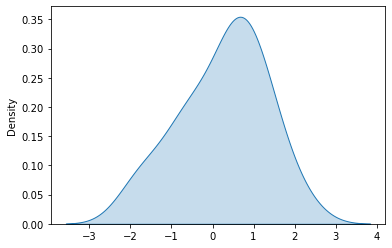

C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

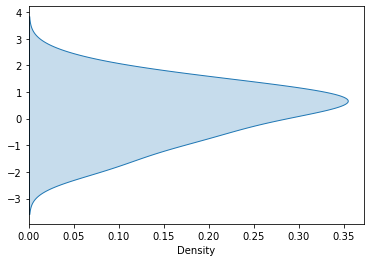

In [18]:
sns.kdeplot(dataset,vertical=True,shade=True)

<AxesSubplot:ylabel='Density'>

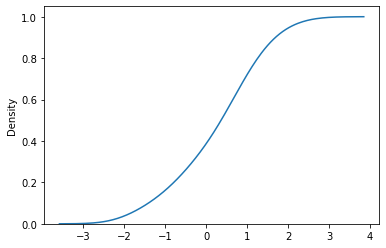

In [19]:
sns.kdeplot(dataset,cumulative=True)

In [23]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

ValueError: If using all scalar values, you must pass an index

C:\Users\ivaxevani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


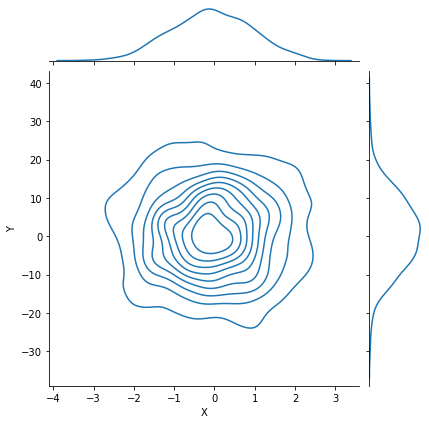

In [24]:
sns.jointplot('X', 'Y', dframe,kind='kde')